<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores = pd.read_csv('./sat_scores.csv')

#seperate out the columns first and assign as a list

header = sat_scores.columns

#the items in header above will be the key for the dictionary

data = []
with open('./sat_scores.csv', 'r') as f:
    rows = f.readlines()
    #print(rows)
    for row in rows:
        row = [x for x in row.splitlines()]  #splitlines is to remove the \n at the end
        for string in row:
            data.append(string.split(',')) #to split the strings within the list into individual elements 
            # from ['State,Rate,Verbal,Math'] to ['State','Rate','Verbal','Math']

#After spliting the data, now it is time to construct the dictionary
#First remove the header from the data:

data_1 = data[1::]  #data_1 is data without the header

data_2 = [] #each list in data_2 is a list containing values from each column of the original data set
State = []
Rate = []
Verbal = []
Math= []

for row_1 in data_1:
    #create the 4 lists above
    State.append(row_1[0])
    Rate.append(float(row_1[1]))    #convert the numbers which are strings to float
    Verbal.append(float(row_1[2]))
    Math.append(float(row_1[3]))

data_2.append(State)
data_2.append(Rate)
data_2.append(Verbal)
data_2.append(Math)

#Now to create the dictionary using the zip method:

SAT_dict = dict(zip(header,data_2))

pprint(SAT_dict,width=1200)

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0],
 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
SAT_PD = pd.read_csv('./sat_scores.csv')

print('Data type directly from CSV: ',SAT_PD.dtypes)

SAT_PD2 = pd.DataFrame.from_dict(SAT_dict)

print('Data type from dictionary: ',SAT_PD2.dtypes)


Data type directly from CSV:  State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
Data type from dictionary:  State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
SAT_PD.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [5]:
SAT_PD.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data should be the average SAT scores for both verbal and math as well as the participation rate for the 50 states (proportion of eligible students who took the SAT test)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
a = '2 letter abbreviation of US state'  # description of 'State' column
b = 'SAT participation for that state'  # description of 'Rate' column
c = 'Average Verbal SAT score for that state' # description of 'Verbal' column
d = 'Average Math SAT score for that state'   # description of 'Math' column
e = 'This dataframe consist of rows which is SAT score of 1 US state'
f = {'Variables':['State','Rate','Verbal','Math','Dataset:'],'Description':[a,b,c,d,e],'Type of Data':[SAT_PD['State'].dtypes,SAT_PD['Rate'].dtypes,SAT_PD['Verbal'].dtypes,SAT_PD['Math'].dtypes,SAT_PD.shape]}
df = pd.DataFrame(data=f)

df

,Variables,Description,Type of Data
0,State,2 letter abbreviation of US state,object
1,Rate,SAT participation for that state,int64
2,Verbal,Average Verbal SAT score for that state,int64
3,Math,Average Math SAT score for that state,int64
4,Dataset:,This dataframe consist of rows which is SAT sc...,"(52, 4)"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


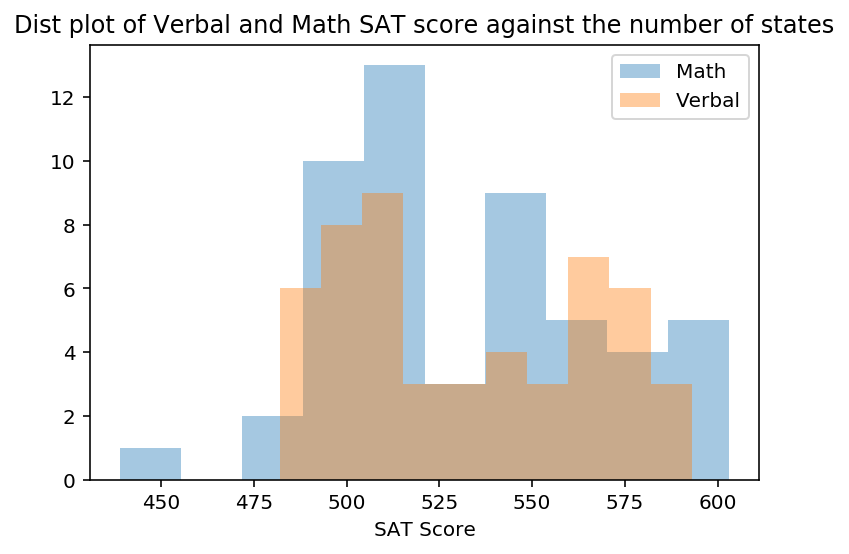

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


plot1 = sns.distplot(SAT_PD['Math'],kde=False,axlabel='SAT Score',label='Math',bins=10).set_title('Dist plot of Verbal and Math SAT score against the number of states')
plot2 = sns.distplot(SAT_PD['Verbal'],kde=False,axlabel='SAT Score',label='Verbal',bins=10)

plot2.legend(loc=1)


/Users/jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Number of states')

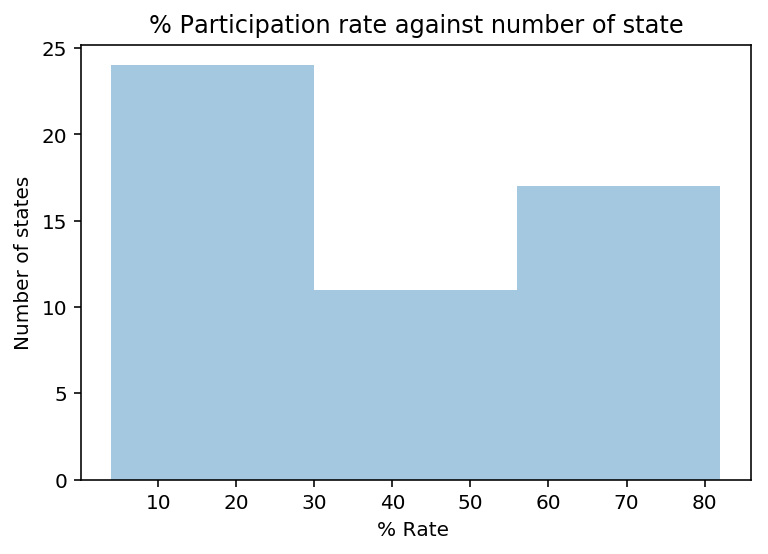

In [8]:
Rate = SAT_PD['Rate']

plot1 = sns.distplot([Rate],kde=False)

#alpha is to adjust transparency of chart

plt.title('% Participation rate against number of state')
plt.xlabel('% Rate ')
plt.ylabel('Number of states')



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Text(0.5, 0.98, 'Pairplot for Rate, Math and Verbal')

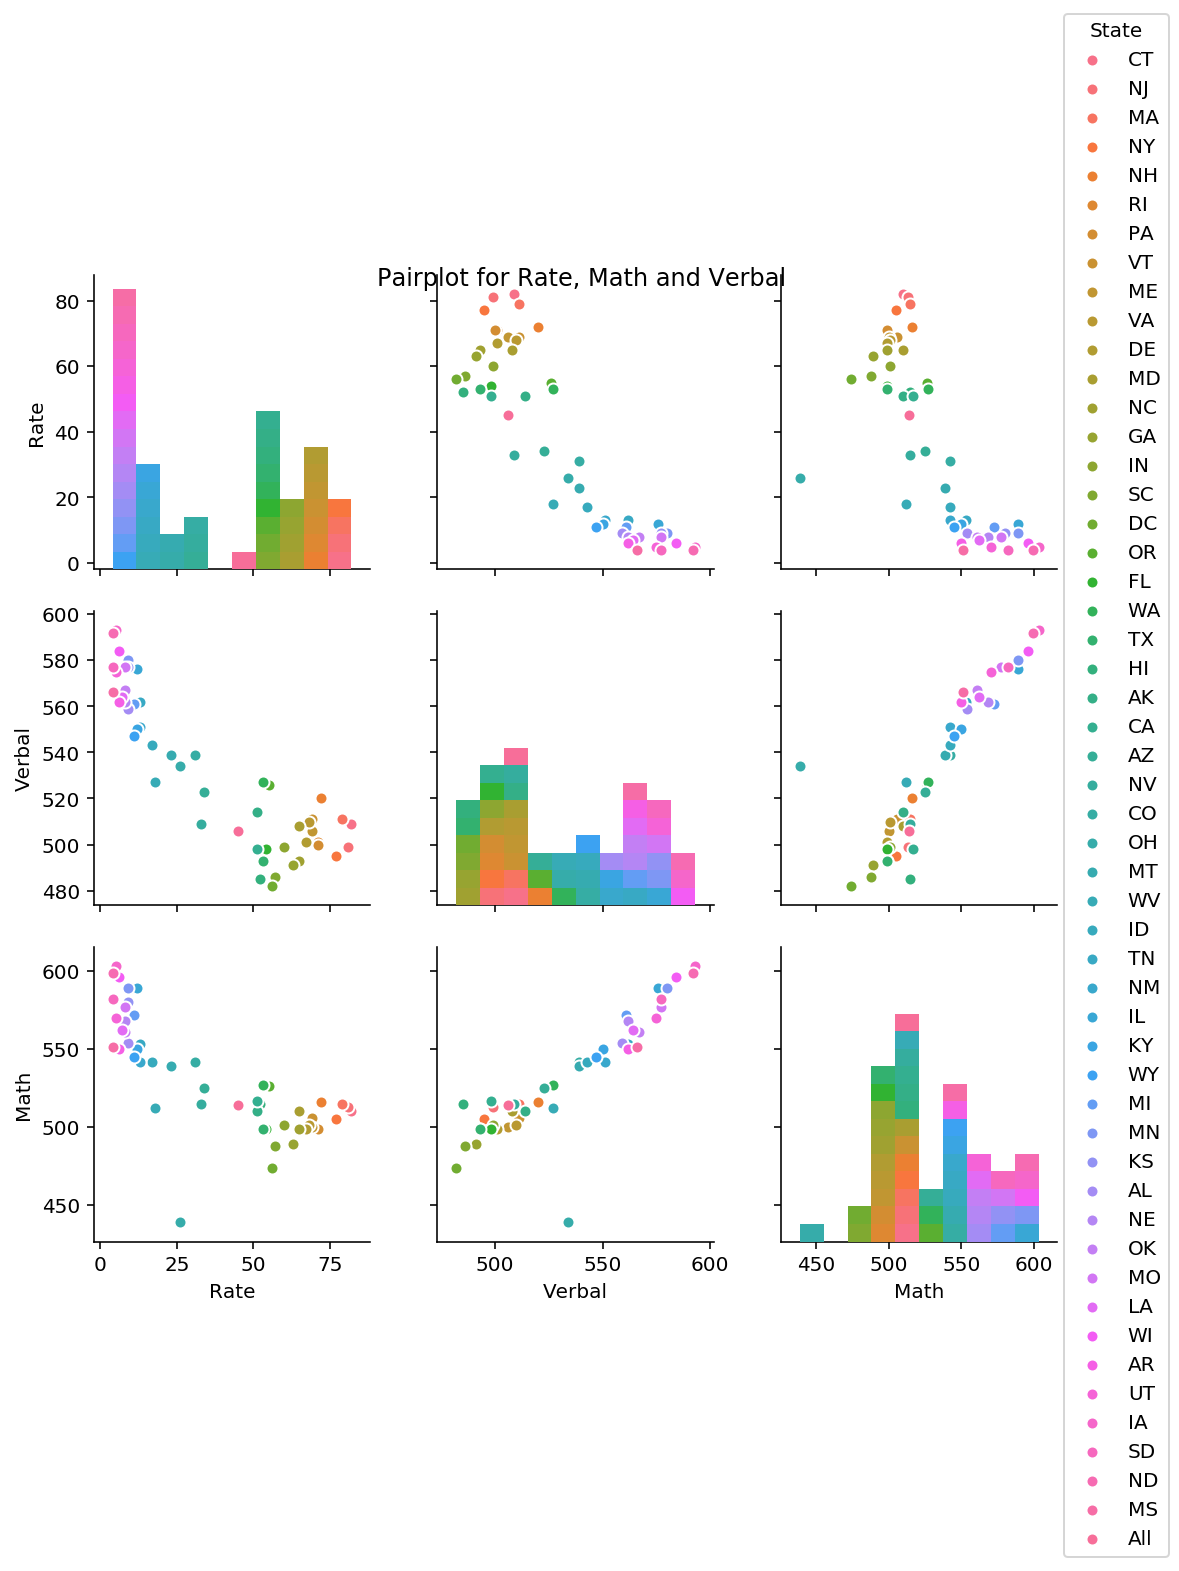

In [9]:
# label xaxis, yaxis, title, legend, ticklabels if applicable
# Aesthetics, xlim, ylim, font sizes etc

plot1 = sns.pairplot(SAT_PD, hue='State')
plot1.fig.suptitle('Pairplot for Rate, Math and Verbal')


From the plots above, some trends can be observed:
1. Verbal and Math SAT scores tend to be negative correlated with particpation rate. A higher participation rate results in a lower average score (higher chances of students with bad score thus pulling down the average)

2. Verbal and Math SAT scores are positive correlated (stronger correlation compared to the 1st observation). Implies that most states with lower average verbal scores have lower math scores and vice versa. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

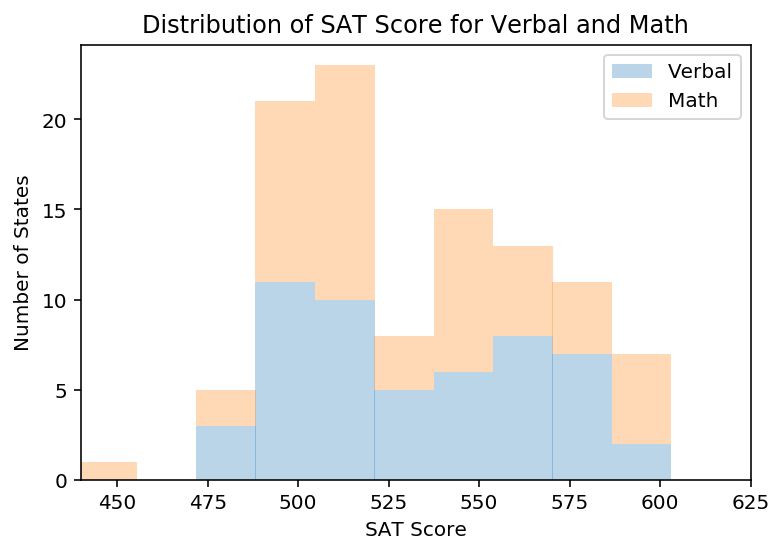

In [10]:
Verbal = SAT_PD['Verbal']
Math = SAT_PD['Math']

#alpha is to adjust transparency of chart

legend = ['Verbal','Math']
plt.hist([Verbal,Math],stacked=True,bins=10,width=16.5,alpha=0.3)
plt.xlim(440,625)
plt.xlabel("SAT Score")
plt.ylabel("Number of States")
plt.title('Distribution of SAT Score for Verbal and Math')
plt.legend(legend)
plt.show()


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Value')

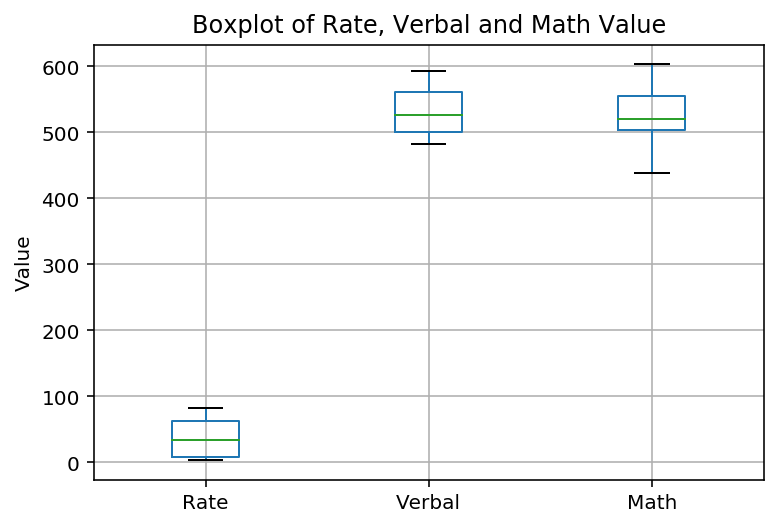

In [11]:
SAT_PD.boxplot()
plt.title('Boxplot of Rate, Verbal and Math Value')
plt.ylabel('Value')

Answers:

Benefits of a boxplot is that it allow us to visualize the spread of the variable at a glance and also to show if there are any outliers in the data

Plotting the rate on the same chart as the Math and Verbal shrinks the plots as the scale of the rate is only between 0 to 100 while the verbal and math ranges are 800. Such a plot is not visually impactful and effective for the target audience.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Answers:

Calculating the Verbal and Math score as a percentage based on the maximum score (800) for each data point. E.g Verbal score of 500 is 500/800*100% = 62.5%

After that, plot the rate, on the same boxplot will cause the scale to be based on percentage rather than 'absolute numbers'

In [12]:
#convert the values in the dataframe to a percentage score:

#create a lambda function to convert Verbal and Math scores to %
percentage = lambda x: (x/800)*100

SAT_PD1 = SAT_PD.copy()

#create a copy so that we preserve the original dataframe

In [13]:
SAT_PD1['Verbal'] = SAT_PD1['Verbal'].apply(percentage)
SAT_PD1['Math'] = SAT_PD1['Math'].apply(percentage)

#both verbal and math are converted to a percentage value
#next is to plot all the data on a 100

In [14]:
SAT_PD1  #shows the dataframe with the converted values

,State,Rate,Verbal,Math
0,CT,82,63.625,63.750
1,NJ,81,62.375,64.125
2,MA,79,63.875,64.375
3,NY,77,61.875,63.125
4,NH,72,65.000,64.500
5,RI,71,62.625,62.375
6,PA,71,62.500,62.375
7,VT,69,63.875,63.250
8,ME,69,63.250,62.500
9,VA,68,63.750,62.625


Text(0, 0.5, '% Value')

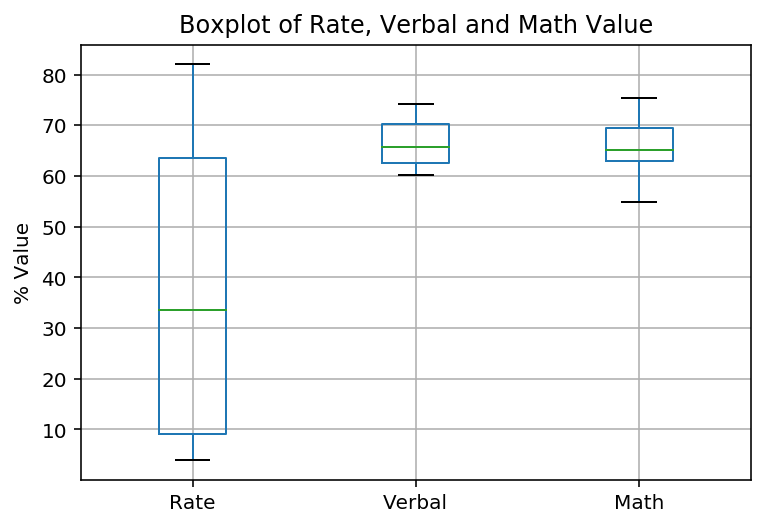

In [15]:
SAT_PD1.boxplot()
plt.title('Boxplot of Rate, Verbal and Math Value')
plt.ylabel('% Value')

From the refined boxplot the scale is much more concise and easier to intepret. From this boxplot, we can see that the Verbal and Math scores are much more narrow (less variances) as compared to the participation rate

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
SAT_PD[SAT_PD['Verbal']>=SAT_PD['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [17]:
SAT_PD2 = SAT_PD[SAT_PD['Verbal']>=SAT_PD['Verbal'].mean()]

SAT_PD2

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [18]:
SAT_PD2.describe()

# There are 24 states that have mean scores greater than the mean. (out of a total of 50)
# Which is about half of the states. This implies that half of the state has verbal scores less than the mean
# This show us that the distribution is not skewed and it is centered at the mean

,Rate,Verbal,Math
count,24.00000,24.000000,24.00000
mean,10.87500,564.041667,560.62500
std,7.03601,16.624966,32.61743
min,4.00000,534.000000,439.00000
25%,6.00000,550.750000,548.75000
50%,9.00000,563.000000,561.50000
75%,12.25000,577.000000,580.50000
max,31.00000,593.000000,603.00000


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
SAT_PD3 = SAT_PD[SAT_PD['Verbal']>=SAT_PD['Verbal'].median()]

SAT_PD3

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [20]:
SAT_PD3.describe()

#Number of state with Verbal score higher than the median is 26. Which is very close
# to the number of state with score higher than the mean. This show us that the mean and median
# are very close to each other.
# this is expected as the distribution of the Verbal score is centered about the mean

,Rate,Verbal,Math
count,26.000000,26.000000,26.000000
mean,12.769231,561.192308,557.461538
std,10.715625,18.857400,33.289315
min,4.000000,527.000000,439.000000
25%,6.250000,547.750000,542.750000
50%,9.000000,562.000000,557.500000
75%,13.000000,576.750000,579.250000
max,53.000000,593.000000,603.000000


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
SAT_PD4 = SAT_PD.copy()

SAT_PD4['Verbal - Math'] = SAT_PD4['Verbal'] - SAT_PD4['Math']

SAT_PD4

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
SAT_PD4.sort_values(by='Verbal - Math', ascending=False).head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [23]:
SAT_PD5 = SAT_PD.copy()
SAT_PD5['Math - Verbal'] = SAT_PD5['Math'] - SAT_PD5['Verbal']

SAT_PD5.sort_values(by='Math - Verbal',ascending=False).head(3)

,State,Rate,Verbal,Math,Math - Verbal
21,HI,52,485,515,30
23,CA,51,498,517,19
1,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
# Use original Dataframe, SAT_PD

SAT_PD.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


The correlation matrix tells us the correlation of each variable against other variables in 
a table format.
From the correlation matrix, we can see that the Participation rate is inversely correlated
to both and Verbal and Math score. Reason could be that lesser participation rate
implies that only the better students attempted the SAT test which thus causes the average 
score to go up

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
#answer in markdown (read and understand and write down what the output means)

SAT_PD.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


Answer:

Count shows the number of elements in column (Rate, Verbal and Math)
Mean is the mean of the Rate, Verbal and Math across all the states
Std is the standard deviation of the Rate, Verbal and Math score
min is the smallest value in each column
25% is the 25 percentile value for each column
50% is the 50 percentile value for each column
75% is the 75 percentile value for each column
max is the higher value in each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
#Difference between covariance and correlation

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
#very open ended question, any possible approach is Ok
#load in data
#checking for null/weird values, are data types correct?
#understand what is the data saying?
#any posssile problems in the dataset? (i.e aggregates age bands)
#identify and fix or find workarounds so that your data is ready for the next step?

drug_df = pd.read_csv('./drug-use-by-age.csv')

drug_df


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [28]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

From the investigation of the data types above, there are some missing data in the cocaine-freq, crack-freq, heroin-freq, inhalant-freq, oxycontin-freq and meth-freq. 
For the age column, it is considered as an object as there are some rows with age-range instead of a single age. 
For the drug use freq, the data can be handled by filling the missing data with 0

There seeems to be an error one data point (age range 65+, stimulant usage and frequency). From the data, the simulant usage % for that age group is 0% but the median number of times a user in age group who used stimulant is 364. How can there be a median number if 0% (no one) in that age group use that drug? 

For the rest of columns with '-' it makes sense to convert them to 0 as the usage % is 0, thus the median number should also be 0.

The next step of cleaning will be to change the value of the stimulant frequency from 364 to 0 so as to make the dataset logical for further analysis.

In [29]:
drug_df1 = drug_df.replace('-',0)

In [30]:
drug_df1 = drug_df1.apply(pd.to_numeric,errors='ignore')
# to convert all values to a float and to ignore errors when applying 
# the function to the whole dataframe

drug_df1.dtypes

#shows that all values were converted to float successfully

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [31]:
drug_df1 = drug_df1.replace(364.0,0)

drug_df1 #cleaned dataframe where the stimulant-frequency is changed from 364.0 to 0

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
# ask questions about the data?
# univariate analysis - distribution (histogram)
# bivariate analysis- correlation/analysis (pairplots)
# create any new features (data engineering) - depends and state any assumptions
# apply transformations like long/wide format if necessary.

In [33]:
#first is data engineering, sum up the percentages for all drug usage 
#in a particular age or age range.

drug_df2 = drug_df1.copy()

drug_df2['total percentage of all drugs'] = drug_df2.iloc[:,2::2].sum(axis=1)

drug_df2 # new data frame with the total percentages of all drugs 


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,total percentage of all drugs
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,9.7
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,18.4
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,37.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,59.6
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,82.1
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,103.6
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,124.9
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,132.2
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,141.5
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,149.0


In [34]:
drug_df2 = drug_df1.copy()

drug_df2['total percentage of all drugs'] = drug_df2.iloc[:,2::2].sum(axis=1)

drug_df3 = drug_df2.iloc[:,::2]

drug_df3 # a dataframe with only the columns on % drug usage for a particular age or age range

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,total percentage of all drugs
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,9.7
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,18.4
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,37.5
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,59.6
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,82.1
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,103.6
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,124.9
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,132.2
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,141.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,149.0


In [35]:
drug_df3.sort_values(by='total percentage of all drugs',ascending=False)

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,total percentage of all drugs
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,149.0
10,22-23,84.2,28.4,4.5,0.5,1.1,5.2,1.0,10.0,1.7,4.4,3.6,0.6,0.2,145.4
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,141.5
11,24-25,83.1,24.9,4.0,0.5,0.7,4.5,0.8,9.0,1.3,4.3,2.6,0.7,0.2,136.6
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,132.2
12,26-29,80.7,20.8,3.2,0.4,0.6,3.2,0.6,8.3,1.2,4.2,2.3,0.6,0.4,126.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,124.9
13,30-34,77.5,16.4,2.1,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4,111.7
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,103.6
14,35-49,75.0,10.4,1.5,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3,95.9


Creating a subset of the full dataframe showing only the percentage of drug used and arranging by total percentage uses

The sum shows that some of the age group have % more than 100%, a possible reason could be that some portions of the surveyed population took more than 1 type of drug and thus there is a repeat in the calculation. Furthermore, some drugs such as cocaine and crack are the same substance but used in a different way. Oxycontin is a class of pain killers and there is also a column called pain-relievers. In short, there are overlapping categories of drugs and types of drugs in the above table. 
Due to this reason, we are unable to compare exactly the percentages of each drug or drug type across the different age bands.

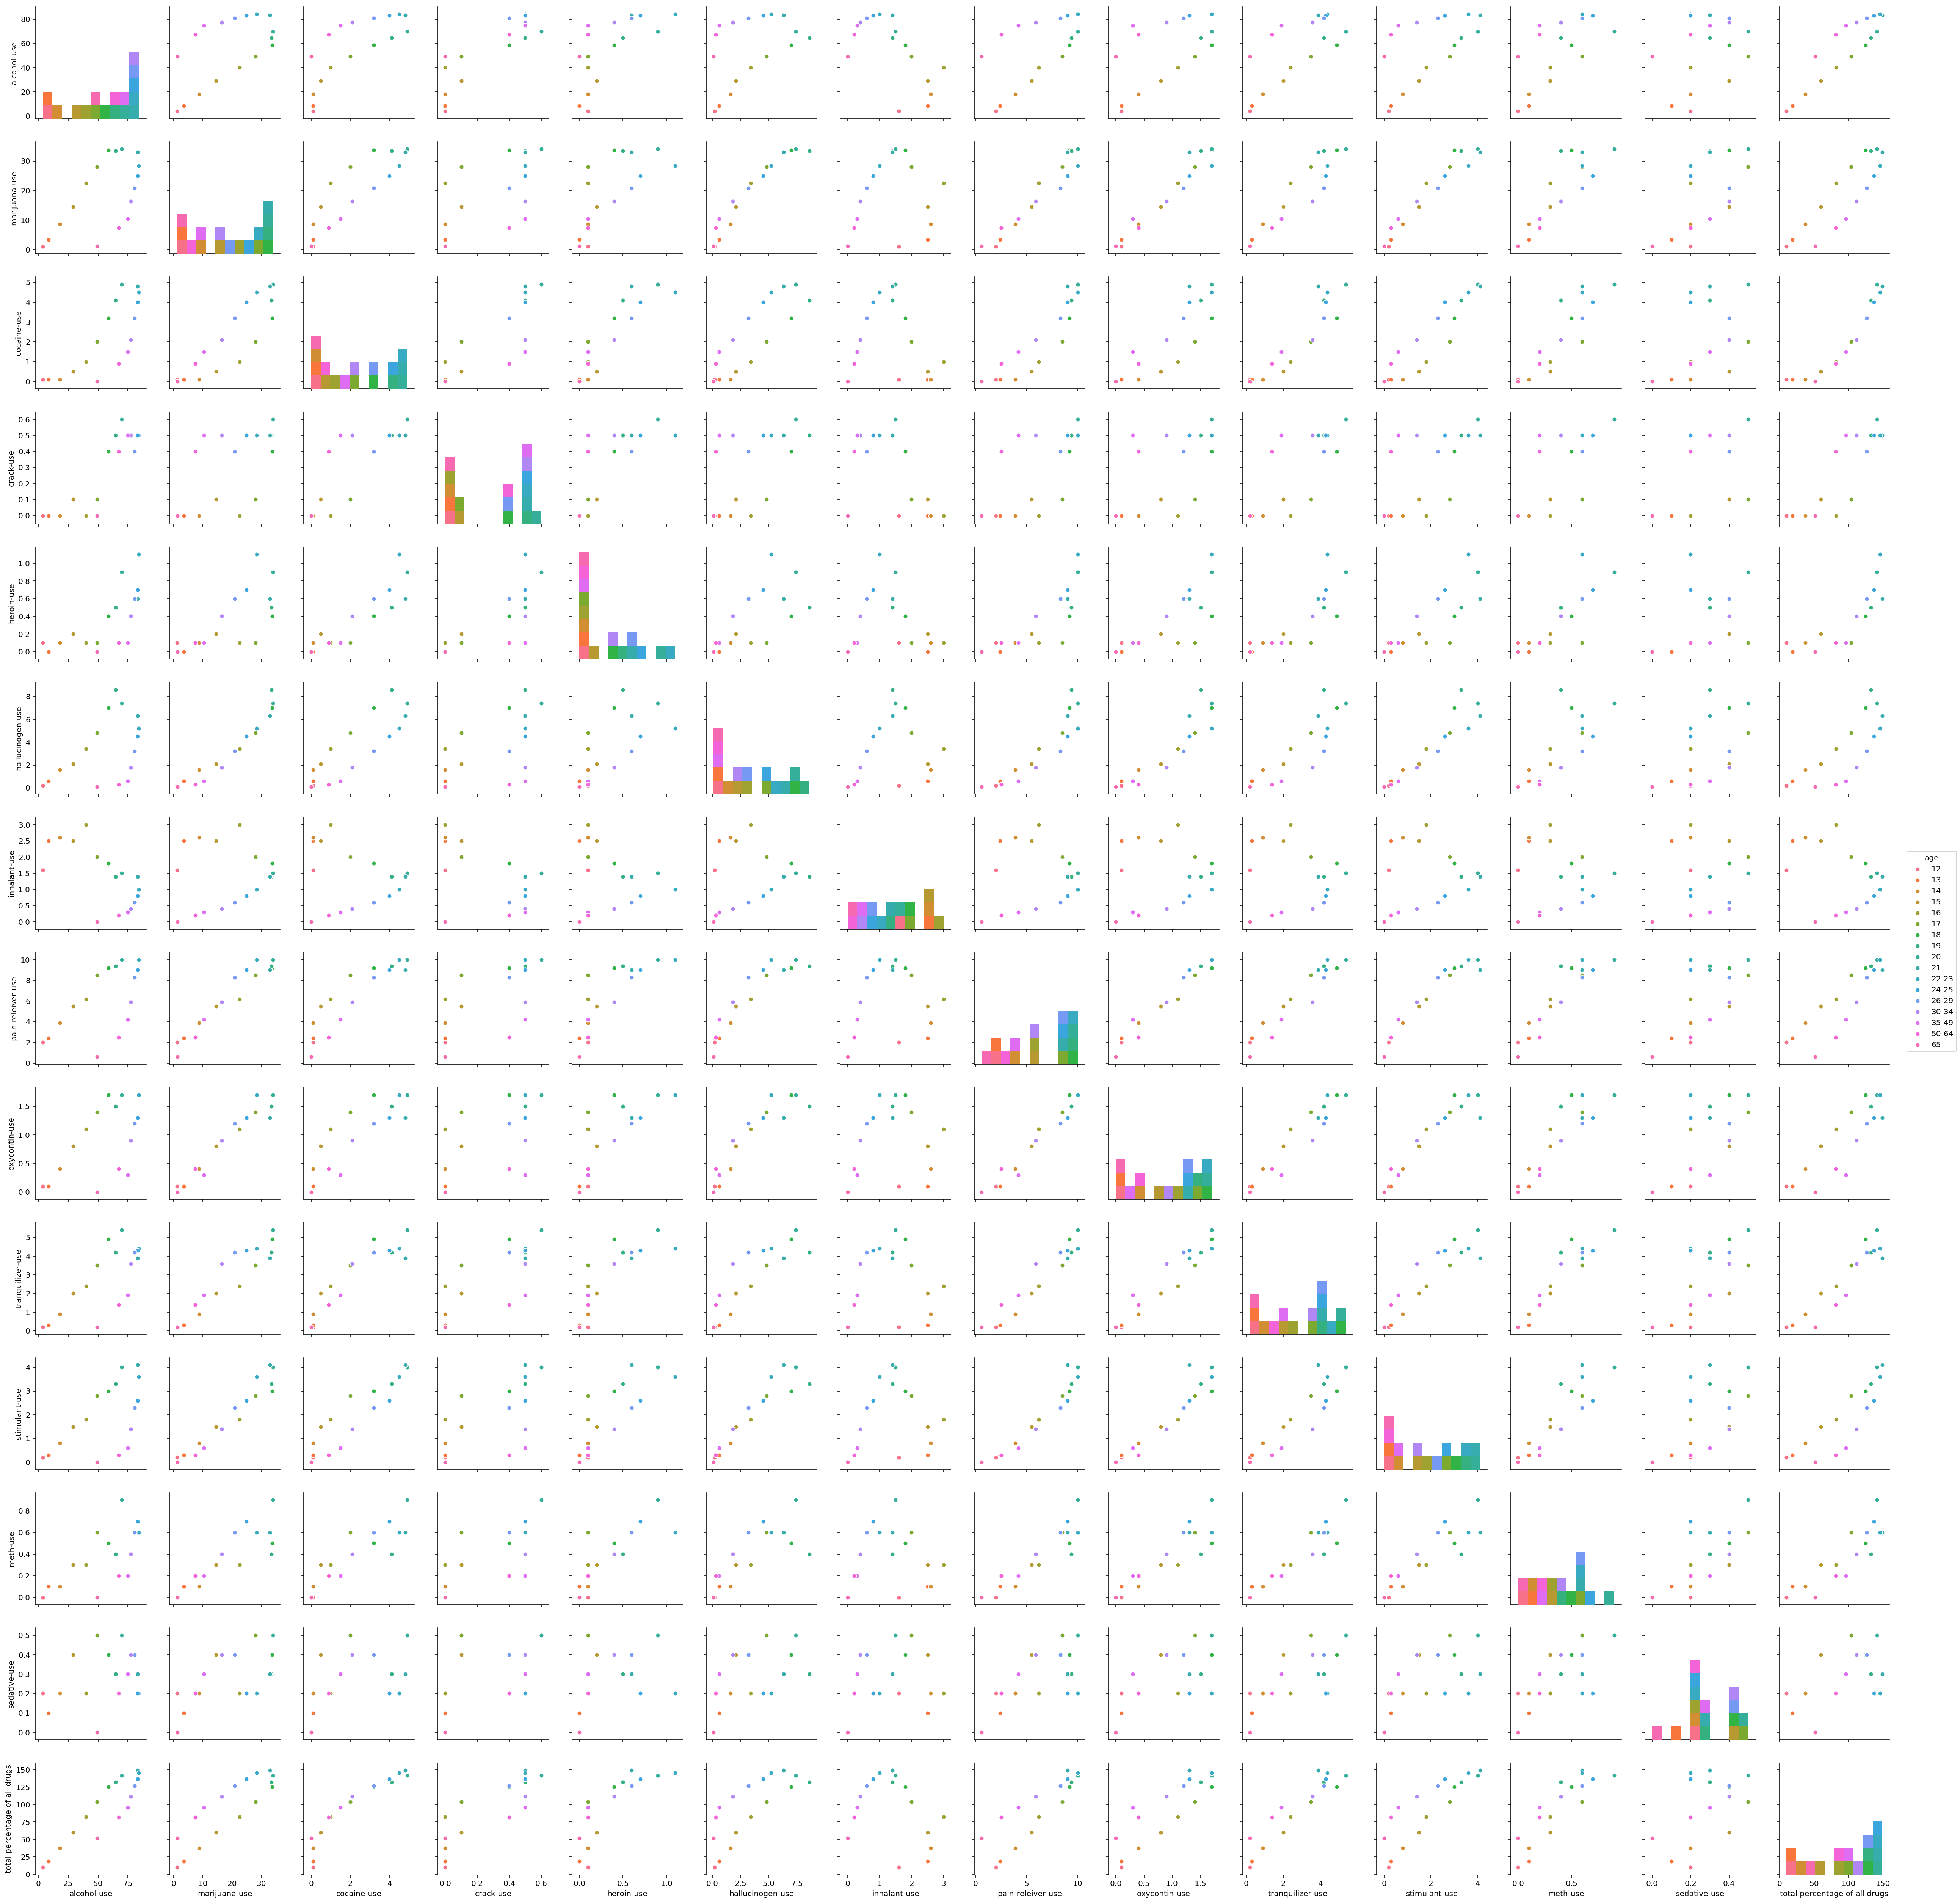

In [36]:
# Start of with a pairplot for all classes and types of drugs

plot2 = sns.pairplot(drug_df3,hue='age')
# As can be seen from the visualisation below, a pairplot for the entire dataset is not practical and useful, thus 
# logical step will be to do pairplots on subset of the entire dataframe





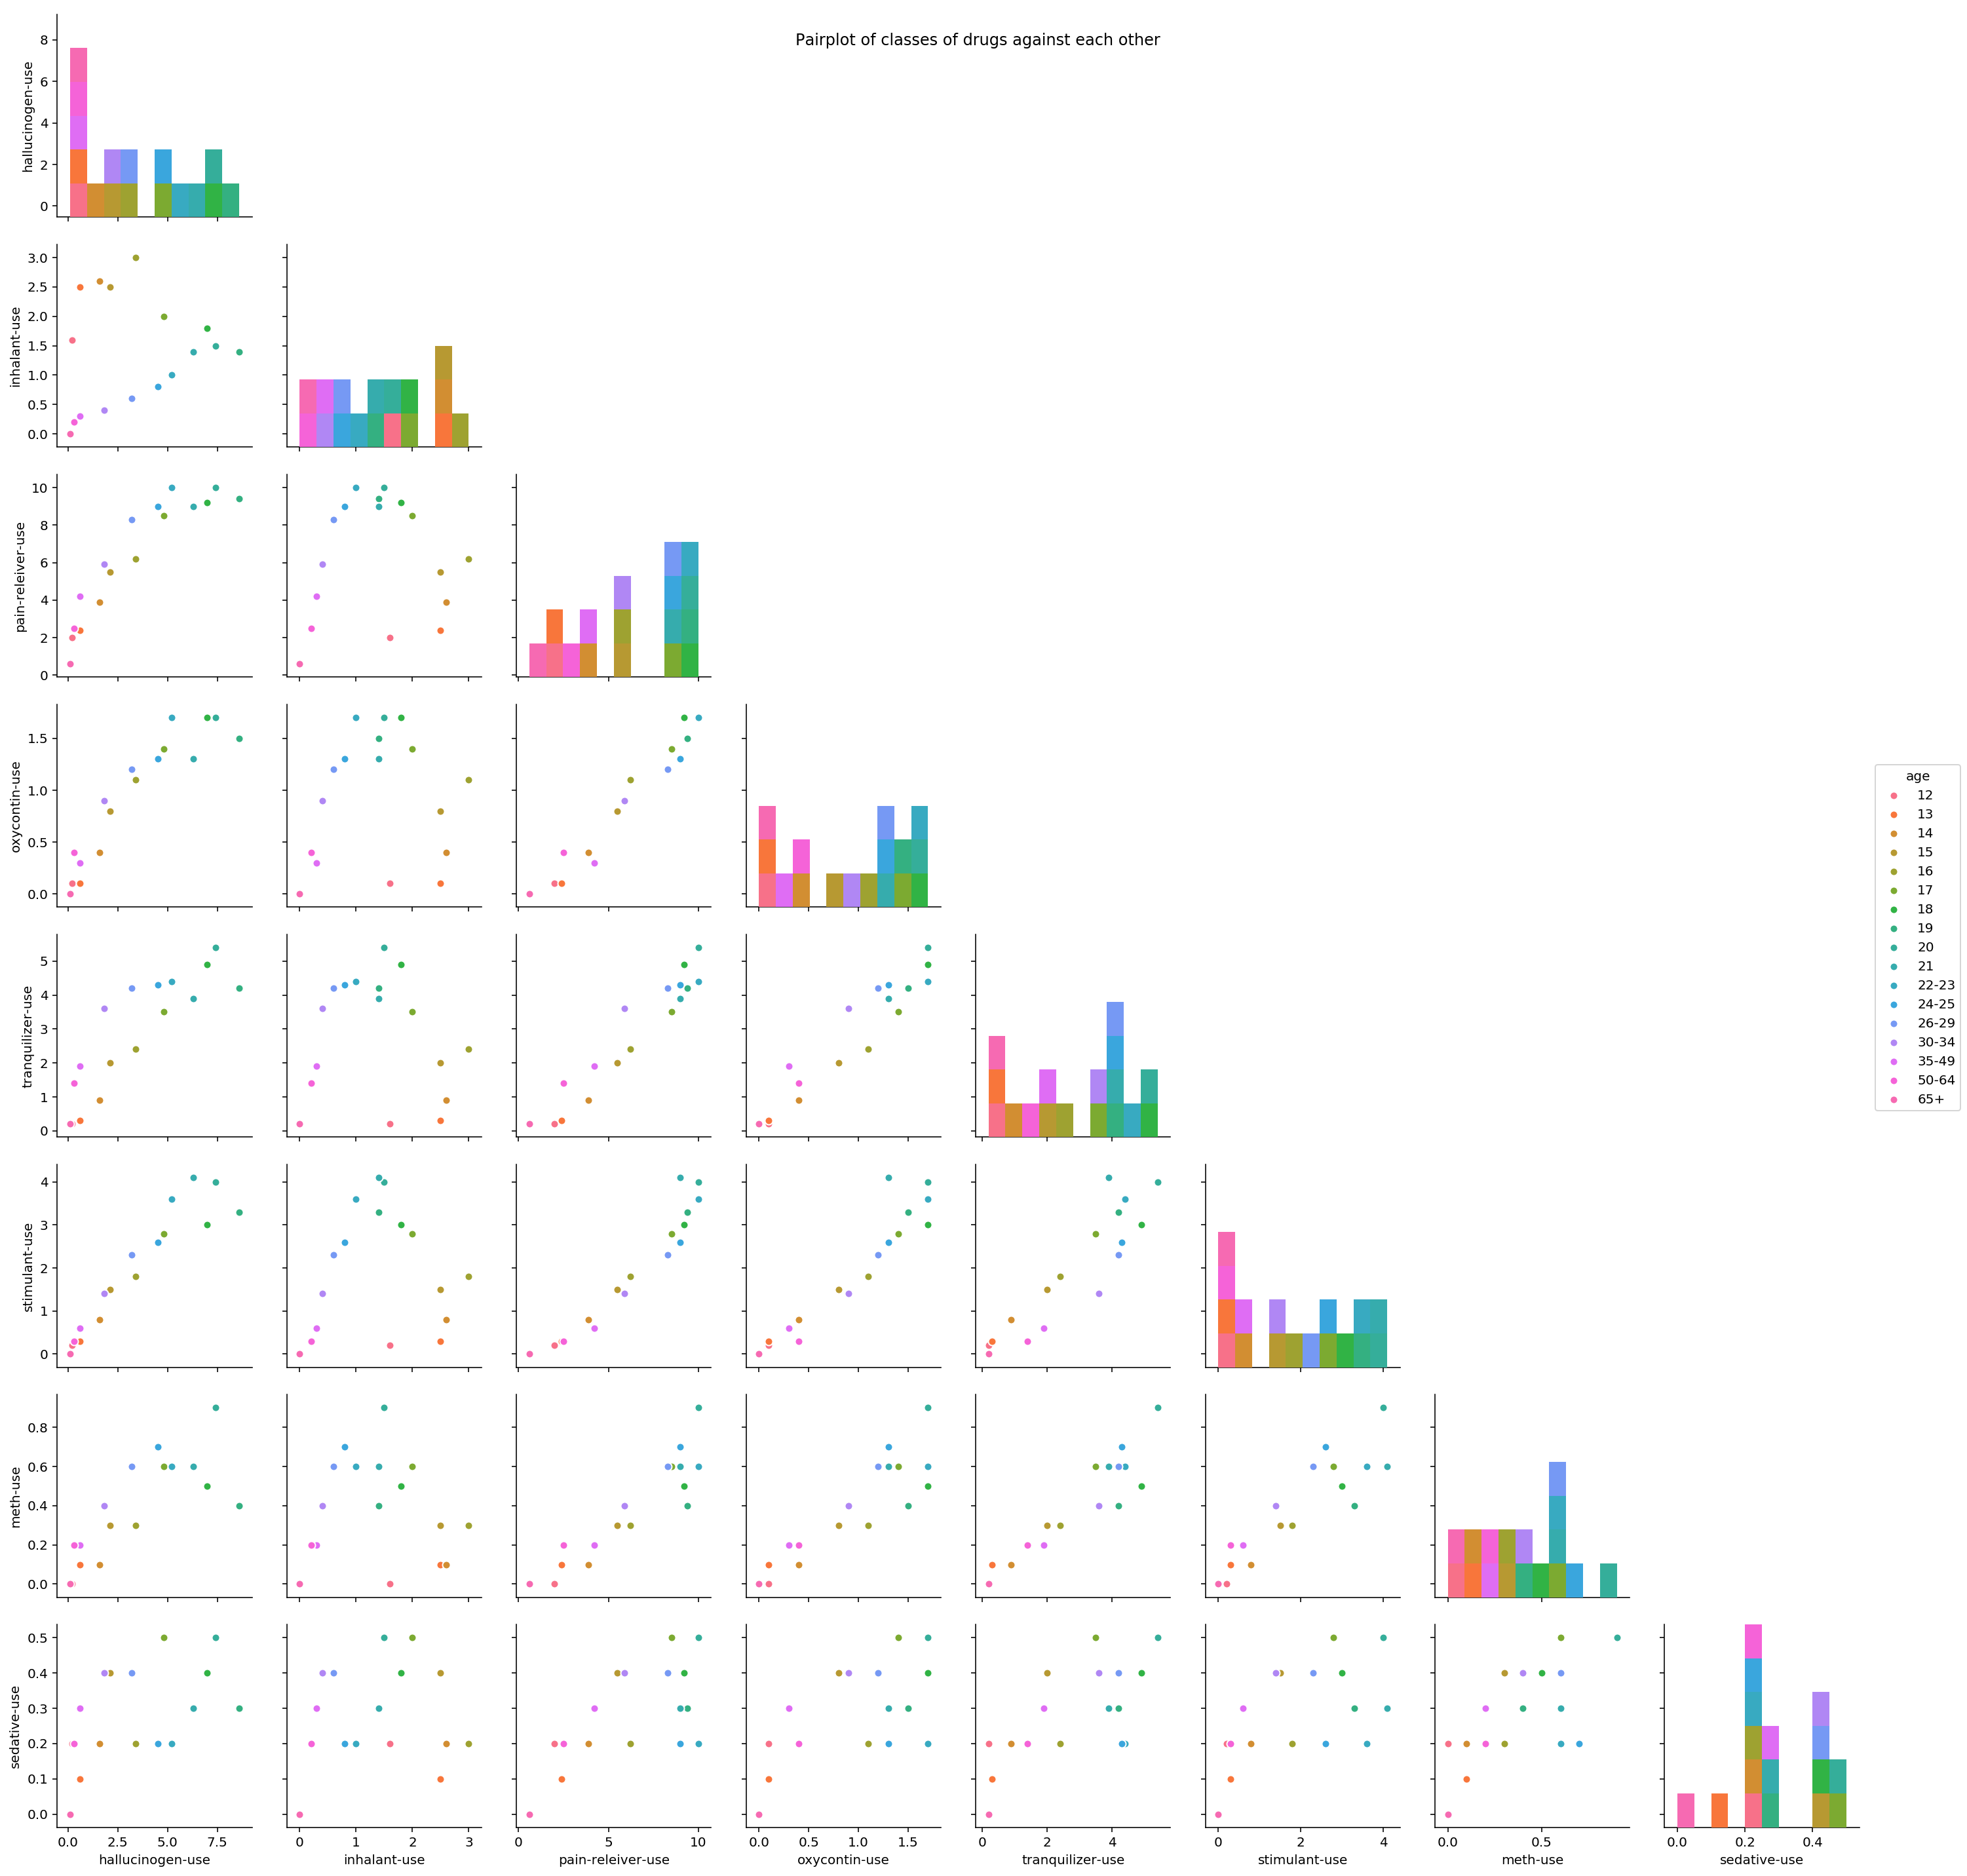

In [37]:
drug_df4 = drug_df3.drop(drug_df3.columns[[1,2,3,4,5,14]],axis=1)

#subset of only hallucinogen to sedative

drug_df4
plot3 = sns.pairplot(drug_df4,hue='age')
plot3.fig.suptitle('Pairplot of classes of drugs against each other')

for i,j in zip(*np.triu_indices_from(plot3.axes,1)): #to display only half the plot top reduce confusion
    plot3.axes[i,j].set_visible(False)

From this neater pairplot, it can be observed that sedative-use (last row) has very low correlation with every other type of drug class usage

The plots that show good correlation are hallucinogen-use against 
stimulant, tranquilizer, oxycontin and pain reliever use (first column)
Pain reliever use against meth, stimulant, tranquilizer and oxyconton use (3rd column)
Oxycontin use against meth, stimulant and tranquilizer use (4th column)
Tranquilizer use against meth and stimulant (5th column)
And lastly, stimulant use against meth-use (6th column)

Amongst all the above relationship, some such as oxycontin use vs stimulant use. pain-reliever vs stimulant
And pain relieve vs oxycontin use are the best correlated. 

As from literature research, oxycontin is a class of pain-reliever, thus the correlation with pain reliever is not surprising
It is also considered a narcotic that causes euphoria (sense of well being) when abused. The good correlation with 
stimulants may show that users take BOTH oxycontin and stimulants to magnify the effect of well being in an attempt
to get 'high'

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

Answer:

From the EDA above, one hypothesis to investigate is whether oxycontin use and stimulant use are truly correlated? 
What are the possible reasons for such a correlation?

Let's test pearson's r correlation

1. Define Null and Alternate Hypothesis
Ho; p = 0 There is no relationship between oxycontin use and stimulant usage
H1; p <> 0 (not equal) There is a relationship between oxycontin and stimulant usage

With alpha = 0.05 (95% CI)

In [48]:
#Use the pearson r correlation calculation function:
import scipy.stats as stats

r,pvalue = stats.pearsonr(drug_df3['oxycontin-use'],drug_df3['stimulant-use'])

#From this correlation table online, https://www.statisticssolutions.com/table-of-critical-values-pearson-correlation/
    
#Critical p value for pearson correlation (degree of freedom = 17-2 = 15, alpha = 0.05)
critical_p = 0.485

if critical_p < pvalue:
    print ("We reject our null hypothesis and conclude that the true mean NOX value is greater than the median NOX value.")
elif critical_p > pvalue:
    print ("We fail to reject our null hypothesis and conclude that there is a relationship between oxycontin and stimulant usage across all age groups")
else:    
    print ("Our test is inconclusive.")

We fail to reject our null hypothesis and conclude that there is a relationship between oxycontin and stimulant usage across all age groups


So from the pearson correlation test, we can conclude that there is a relationship between the 2 drug class usage. 

As from literature research, oxycontin is a class of pain-reliever.
It is also considered a narcotic that causes euphoria (sense of well being) when abused. The good correlation with stimulants may show that users take BOTH oxycontin and stimulants to magnify the effect of well being in an attempt to get deeper and higher sensation of euphoria

** Question and deliverables**


...

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [40]:
# go back to SAT dataset
# identify outlier in the rate

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.